------------------------------------------------------------------------------------------------------------
Sexratio = 0.25
Expected Ratio:  0.875
Expected Teta = 4*Ne*mu =  0.001125

Number of WF simulations:  81
WF Median Ratio:  0.8996649292628444
Median Pi Autosome:  0.00112772

Number of NWF simulations:  100
NWF Median Ratio:  0.9020007727347673
Median Pi Autosome:  0.0006984215


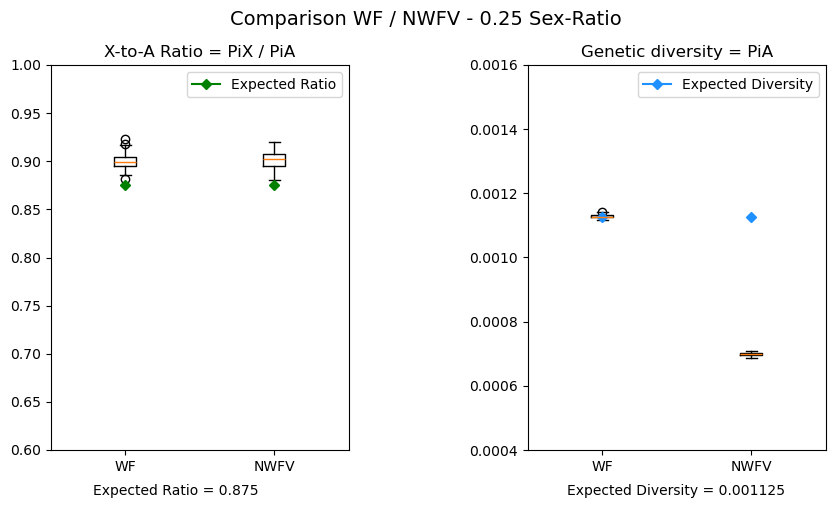

------------------------------------------------------------------------------------------------------------
Sexratio = 0.3
Expected Ratio:  0.85
Expected Teta = 4*Ne*mu =  0.00126

Number of WF simulations:  69
WF Median Ratio:  0.8648385267311548
Median Pi Autosome:  0.00126139

Number of NWF simulations:  100
NWF Median Ratio:  0.8652286477258115
Median Pi Autosome:  0.000815284


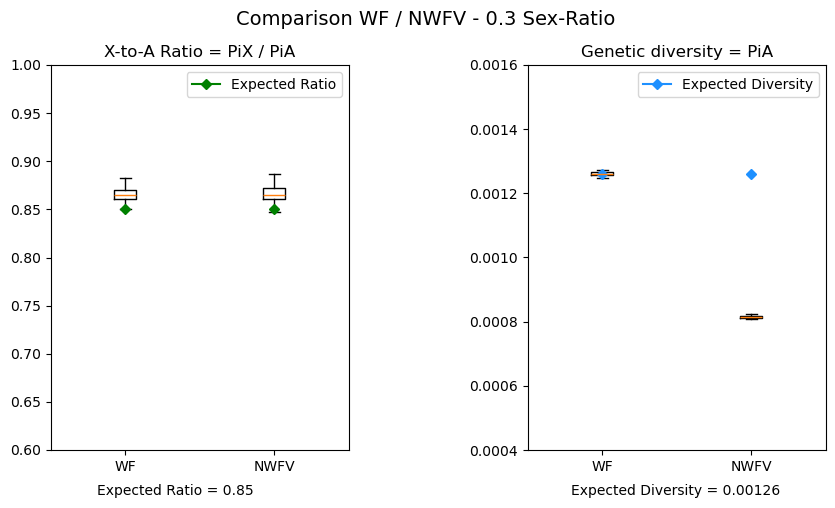

------------------------------------------------------------------------------------------------------------
Sexratio = 0.4
Expected Ratio:  0.8
Expected Teta = 4*Ne*mu =  0.00144

Number of WF simulations:  87
WF Median Ratio:  0.8031824694246222
Median Pi Autosome:  0.00144239

Number of NWF simulations:  100
NWF Median Ratio:  0.8058232611540811
Median Pi Autosome:  0.0010023900000000001


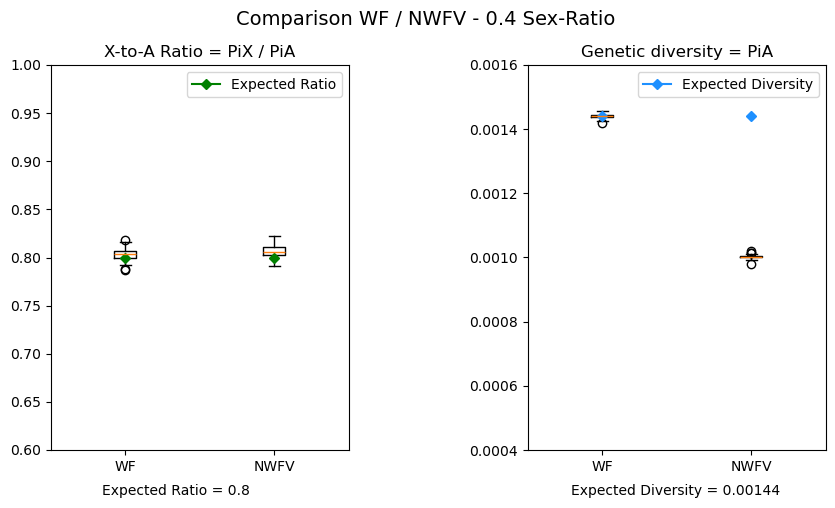

------------------------------------------------------------------------------------------------------------
Sexratio = 0.5
Expected Ratio:  0.75
Expected Teta = 4*Ne*mu =  0.0015

Number of WF simulations:  78
WF Median Ratio:  0.7490652294866791
Median Pi Autosome:  0.0015022149999999999

Number of NWF simulations:  100
NWF Median Ratio:  0.7512115794003775
Median Pi Autosome:  0.001109695


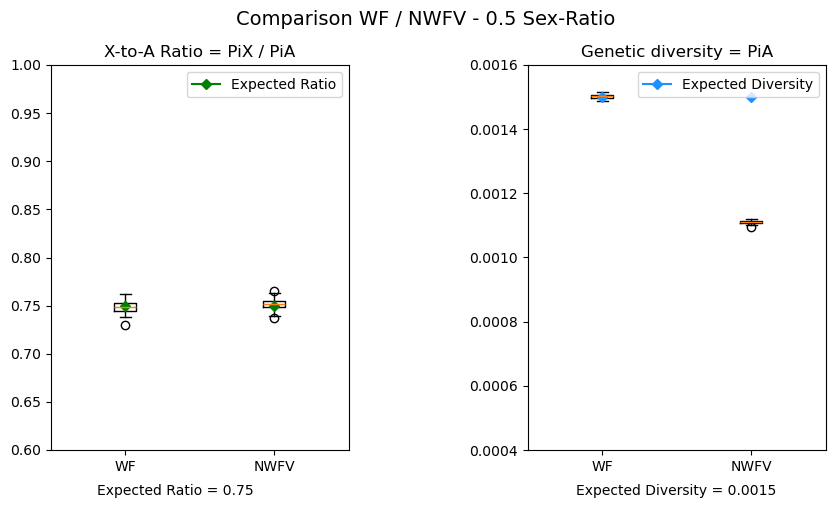

------------------------------------------------------------------------------------------------------------
Sexratio = 0.6
Expected Ratio:  0.7
Expected Teta = 4*Ne*mu =  0.00144

Number of WF simulations:  83
WF Median Ratio:  0.702407456061507
Median Pi Autosome:  0.00144286

Number of NWF simulations:  100
NWF Median Ratio:  0.7053430717426832
Median Pi Autosome:  0.001003085


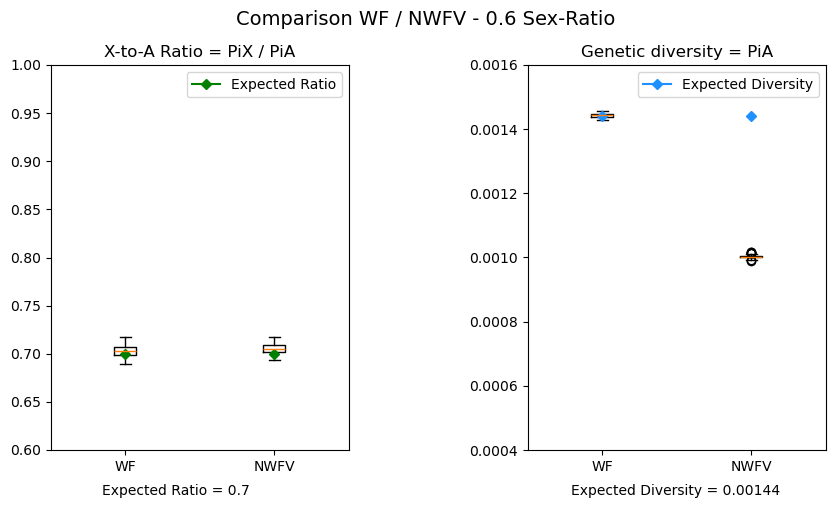

------------------------------------------------------------------------------------------------------------
Sexratio = 0.7
Expected Ratio:  0.65
Expected Teta = 4*Ne*mu =  0.00126

Number of WF simulations:  50
WF Median Ratio:  0.6615701682423352
Median Pi Autosome:  0.0012610450000000001

Number of NWF simulations:  100
NWF Median Ratio:  0.663759556825124
Median Pi Autosome:  0.0008140945


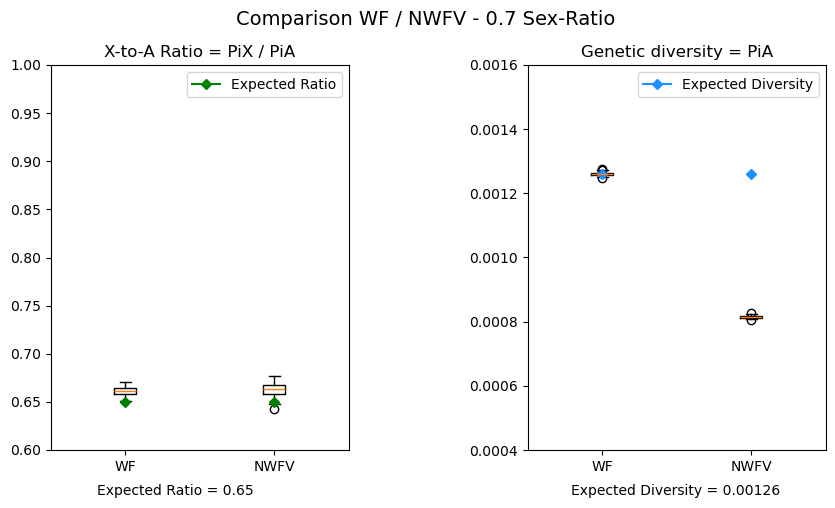

------------------------------------------------------------------------------------------------------------
Sexratio = 0.75
Expected Ratio:  0.625
Expected Teta = 4*Ne*mu =  0.001125

Number of WF simulations:  74
WF Median Ratio:  0.6430963763680838
Median Pi Autosome:  0.001124405

Number of NWF simulations:  100
NWF Median Ratio:  0.6460031062817967
Median Pi Autosome:  0.0006999605000000001


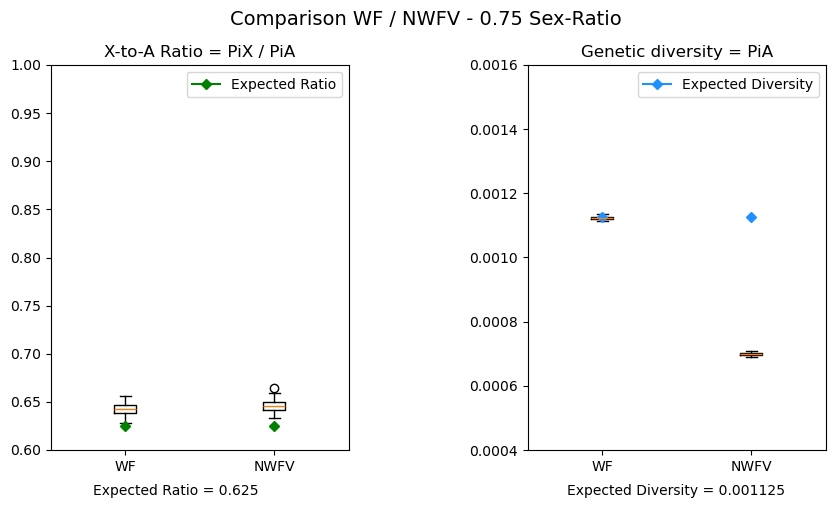

In [2]:
# Wright Fisher model
import matplotlib.pyplot as mp
import numpy as np
import os 

FOLDER = "/mnt/primevo/work/timothe_dandoy/SLiM_Project/tmp/NWF_Vanilla/Pi_WF_NWFVan/"
FOLDER_output = "/mnt/primevo/work/timothe_dandoy/SLiM_Project/done/NWF_Vanilla/Pi_WF_NWFVan/"

LSexRatio = [0.25,0.3,0.4,0.5,0.6,0.7,0.75]

for SR in LSexRatio:
    WF_Pi_ratio = []
    NWF_Pi_ratio = []
    WF_PiA = []
    NWF_PiA = []
    for NUM in range(1,501):
        File = FOLDER+"WF_SexRatio"+str(SR)+","+str(NUM)+".txt"
        if os.path.isfile(File):
            Text = open(File, 'r')
            Values = Text.read().split()
            if len(Values) > 0:
                WF_Pi_ratio.append(float(Values[1])/float(Values[0]))
                WF_PiA.append(float(Values[0]))
                Text.close()
            
        File = FOLDER+"NWF_Van_SexRatio"+str(SR)+","+str(NUM)+".txt"
        if os.path.isfile(File):
            Text = open(File, 'r')
            Values = Text.read().split()
            if len(Values) > 0:
                NWF_Pi_ratio.append(float(Values[1])/float(Values[0]))
                NWF_PiA.append(float(Values[0]))
                Text.close()
    
    expected_ratio = 1-SR*0.5
    Ne = 4*750*(1-SR)*SR   # Ne = 4*Nm*Nf/N  => Ne = 4*N*(1-SR)*SR 
    expected_teta = round (4*Ne*40*1.25e-8,10)
    WF_median = np.median(WF_Pi_ratio)
    NWF_median = np.median(NWF_Pi_ratio)
    WF_PiA_median = np.median(WF_PiA)
    NWF_PiA_median = np.median(NWF_PiA)
    print("------------------------------------------------------------------------------------------------------------")
    print("Sexratio = "+str(SR))
    print("Expected Ratio: ",expected_ratio)
    print("Expected Teta = 4*Ne*mu = ", expected_teta )
    print()
    print("Number of WF simulations: ",len(WF_Pi_ratio))
    print("WF Median Ratio: ",WF_median)
    print("Median Pi Autosome: ",WF_PiA_median)
    print()
    print("Number of NWF simulations: ",len(NWF_Pi_ratio))
    print("NWF Median Ratio: ",NWF_median)
    print("Median Pi Autosome: ",NWF_PiA_median)


    fig, ax = mp.subplots(1,2,figsize=(10, 5))
    fig.subplots_adjust(wspace=0.6)
    fig.suptitle(f"Comparison WF / NWFV - {SR} Sex-Ratio", fontsize=14, y=0.99)

    ax[0].boxplot([WF_Pi_ratio,NWF_Pi_ratio],tick_labels=["WF","NWFV"])
    ax[0].set_title("X-to-A Ratio = PiX / PiA")
    ax[0].plot(1, expected_ratio, marker='D', color='green', markersize=5, label='Expected Ratio')
    ax[0].plot(2, expected_ratio, marker='D', color='green', markersize=5)
    ax[0].set_ylim([0.6, 1])
    ax[0].legend()

    ax[1].boxplot([WF_PiA,NWF_PiA],tick_labels=["WF","NWFV"])
    ax[1].set_title("Genetic diversity = PiA")
    ax[1].plot(1, expected_teta, marker='D', color='dodgerblue', markersize=5, label='Expected Diversity')
    ax[1].plot(2, expected_teta, marker='D', color='dodgerblue', markersize=5)
    ax[1].set_ylim([0.0004, 0.0016])
    ax[1].legend()

    fig.text(0.25, 0.02, 'Expected Ratio = '+str(expected_ratio), 
         ha='center', fontsize=10)

    fig.text(0.75, 0.02, 'Expected Diversity = '+str(expected_teta), 
         ha='center', fontsize=10)
    
    fig.savefig(FOLDER_output+'WF_NWF_SexRatio'+str(SR)+'.png') 

    mp.show()